In [1]:
from common import prepare_val
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda:0') 
CHECKPOINT_PATH = None
overrides = []
model, network, loader, viz, dataset = prepare_val('GaussianLSS', device, CHECKPOINT_PATH, overrides=overrides, mode='mini_val', batch_size=1)

Loaded pretrained weights for efficientnet-b4
Dataset length: 81


In [26]:
import random

# Example dict
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4}

# Number of keys to sample
N = 2

# Randomly select N keys
keys = random.sample(list(my_dict.keys()), N)

print(keys)  # Output will be something like ['c', 'a']

['d', 'c']


In [ ]:
network.to(device)
model.to(device)
if CHECKPOINT_PATH is None:
    model.metrics.reset()
    network.train()
    # with torch.no_grad():
    for i,batch in enumerate(loader):
        print(i,end='\r')
        if i != 0:
            continue
        for k, v in batch.items():
            if isinstance(v, torch.Tensor):
                batch[k] = v.to(device)
            elif isinstance(v, list):
                if isinstance(v[0], torch.Tensor):
                    batch[k] = [i.to(device) for i in v]
            else:
                batch[k] = v
        pred = network(batch)
        loss = model.loss_func(pred,batch)
        loss[0].backward()
        vis_result = viz(batch,pred)
        break
    for name, param in model.named_parameters():
        if param.requires_grad and param.grad is None:
            print(name)
        
    model.metrics.update(pred,batch)
else:
    network.eval()
    with torch.no_grad():
        for i,batch in enumerate(loader):
            for k, v in batch.items():
                if isinstance(v, torch.Tensor):
                    batch[k] = v.to(device)
                elif isinstance(v, list):
                    if isinstance(v[0], torch.Tensor):
                        batch[k] = [i.to(device) for i in v]
                else:
                    batch[k] = v
            pred = network(batch)
            vis_result = viz(batch,pred)
            break

/home/hcis-s20/miniconda3/envs/GaussianLSS/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


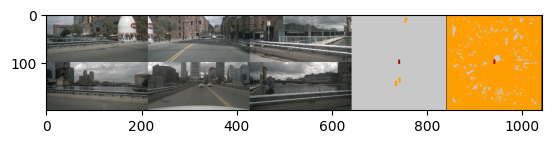

In [ ]:
plt.grid(False)
plt.imshow(vis_result[0])